In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [2]:
train = pd.read_csv('income_evaluation.csv')
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
train.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
train[' income'] = train[' income'].apply(lambda x: 1 if x==' >50K' else 0)
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


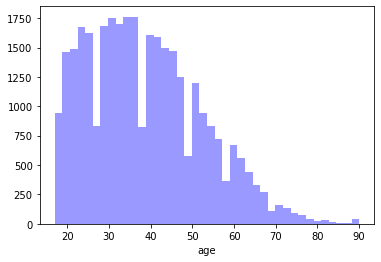

In [7]:
sns.distplot(train['age'].dropna(), kde=False, bins=40, color='Blue')

C:\Users\DostTech\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DostTech\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

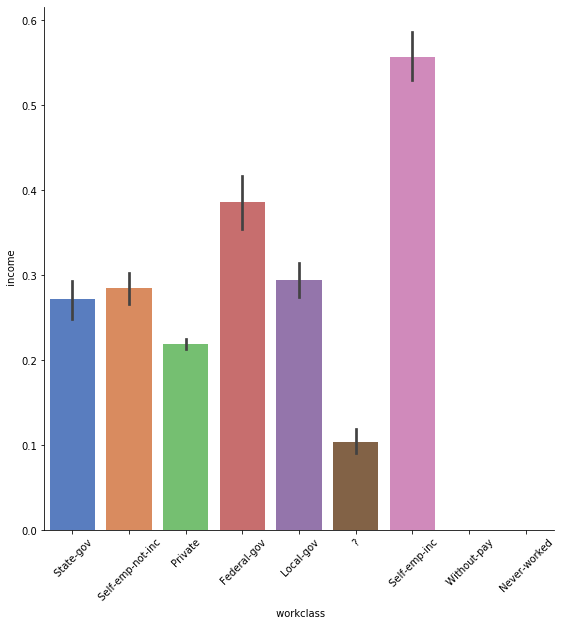

In [8]:
sns.factorplot(x=" workclass", y=" income", data=train, kind="bar", size = 8,  palette = "muted")
plt.xticks (rotation = 45)

In [9]:
train.replace(' ?', np.nan, inplace=True) #as there are ? in our dataset, converting them to NaN

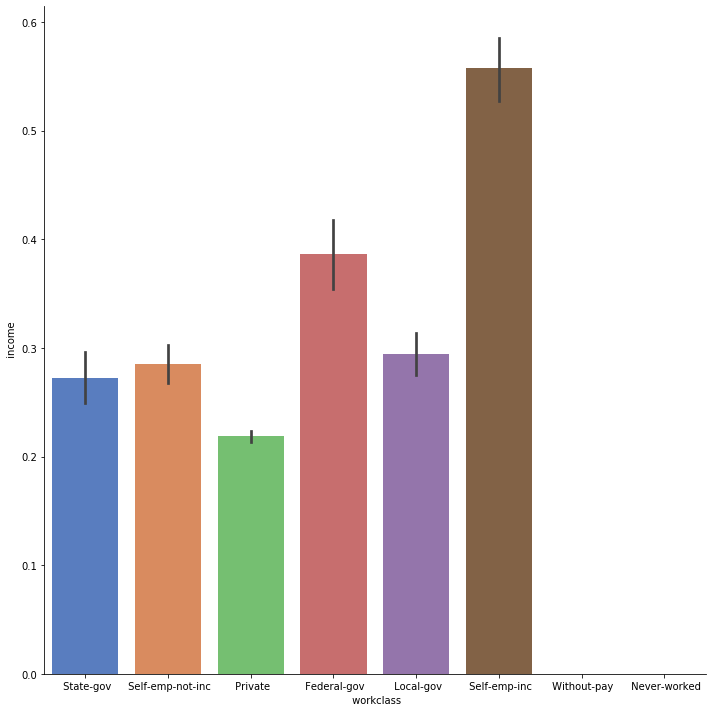

In [10]:
sns.factorplot(x=" workclass", y=" income", data=train, kind="bar", size = 10,  palette = "muted")

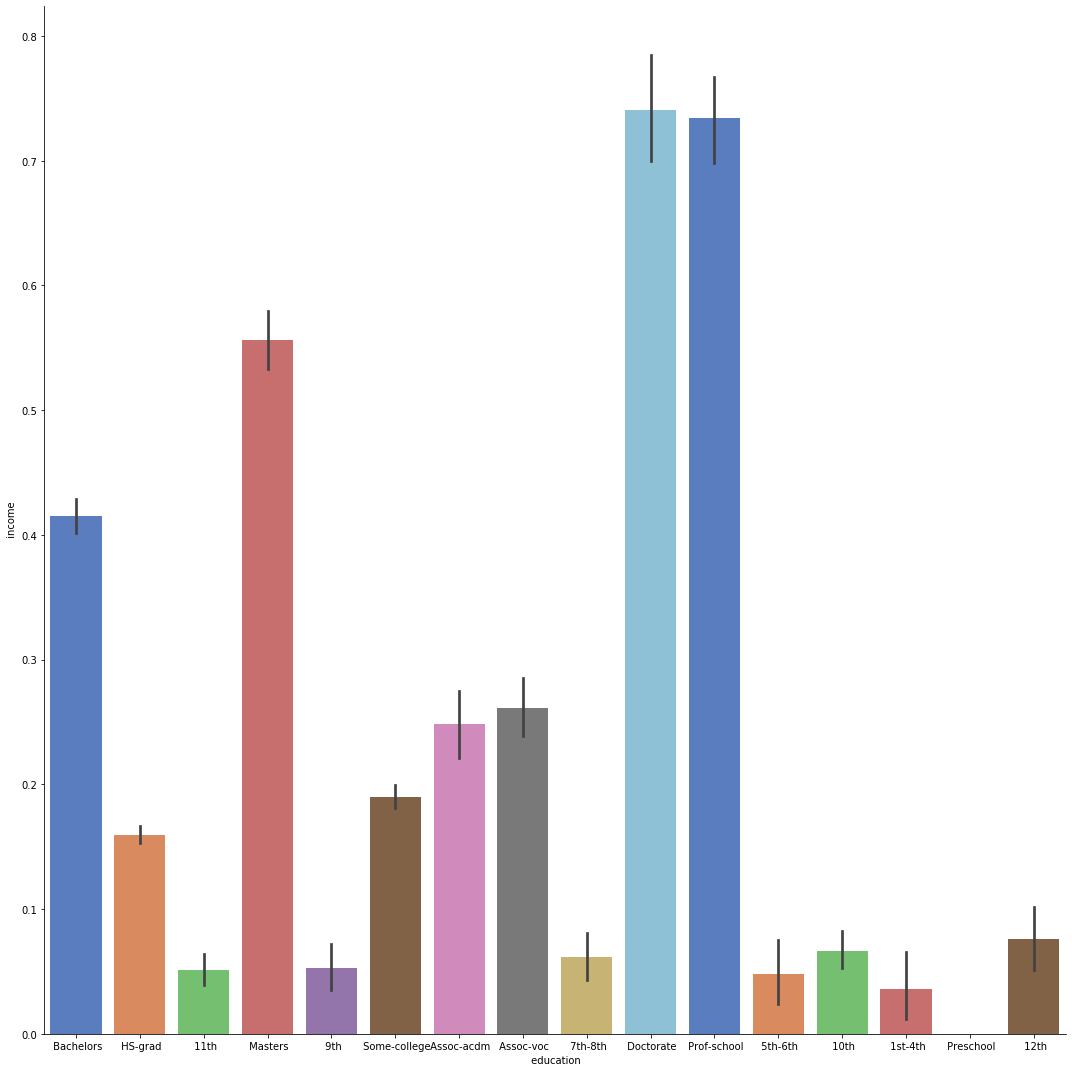

In [11]:
sns.factorplot(x=" education",y=" income",data=train,kind="bar", size = 15,  palette = "muted")

In [12]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [13]:
train[' education'] = train[' education'].apply(primary)

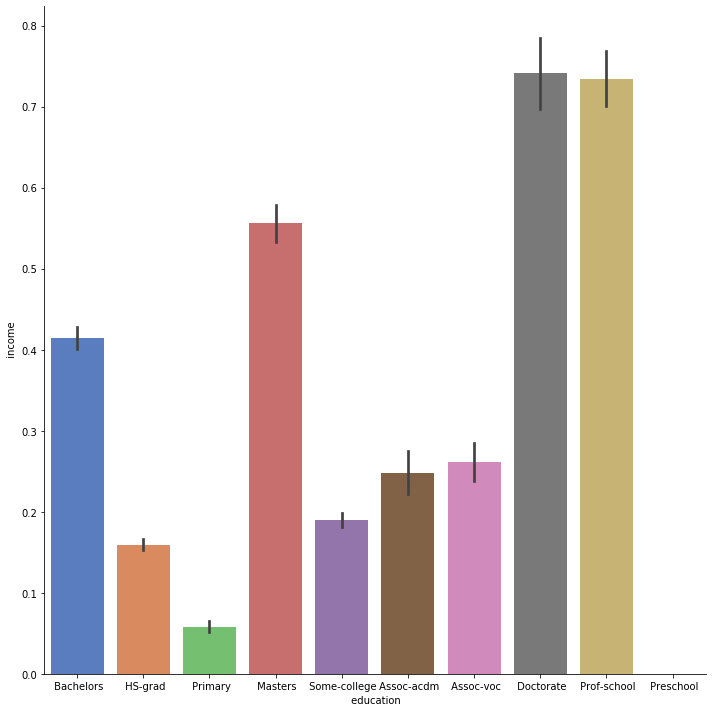

In [14]:
sns.factorplot(x=" education",y=" income",data=train,kind="bar", size = 10,  palette = "muted")

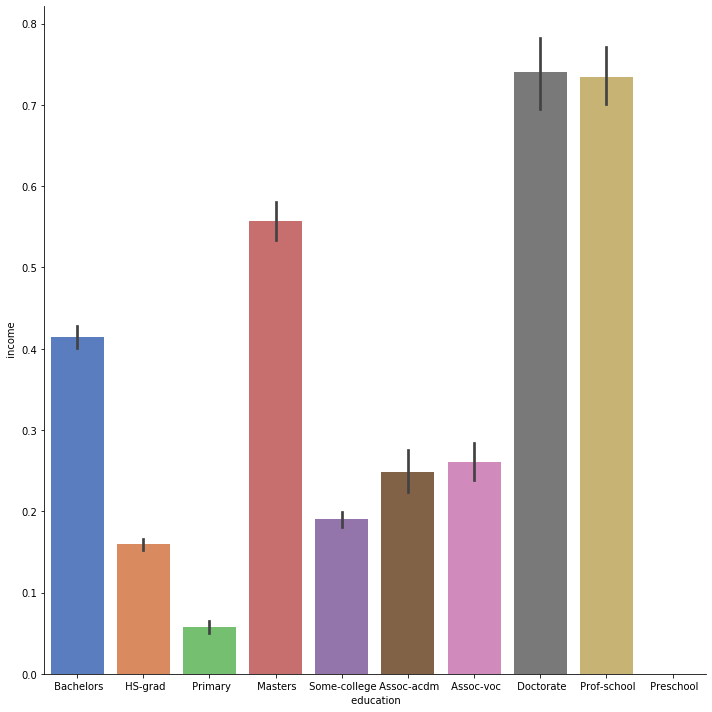

In [15]:
sns.factorplot(x=" education",y=" income",data=train,kind="bar", size = 10, palette = "muted")

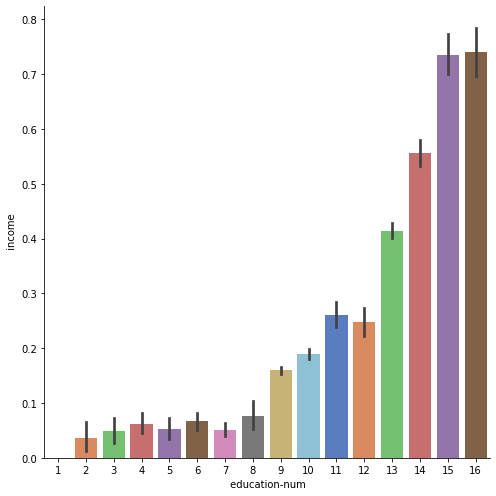

In [16]:
sns.factorplot(x=" education-num",y=" income",data=train,kind="bar", size = 7, palette = "muted")

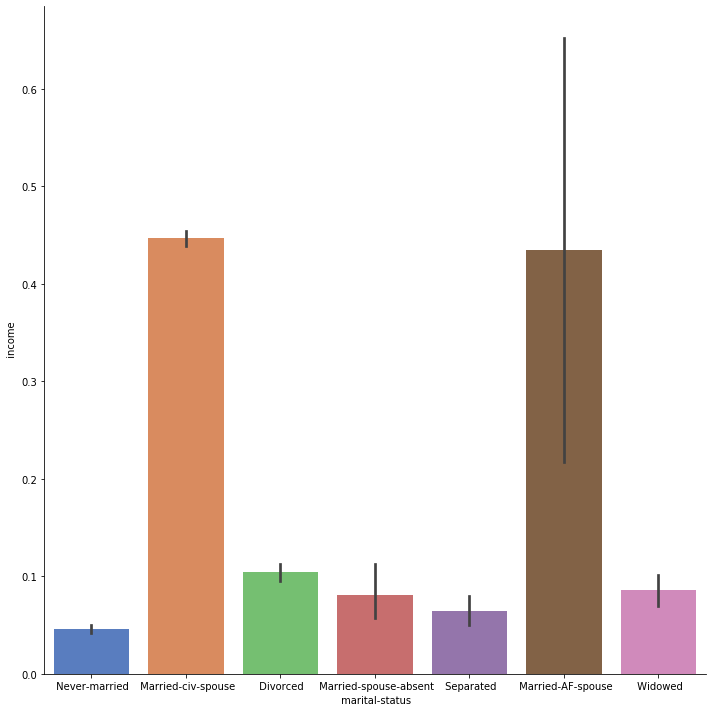

In [17]:
sns.factorplot(x=" marital-status",y=" income",data=train,kind="bar", size = 10,  palette = "muted")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

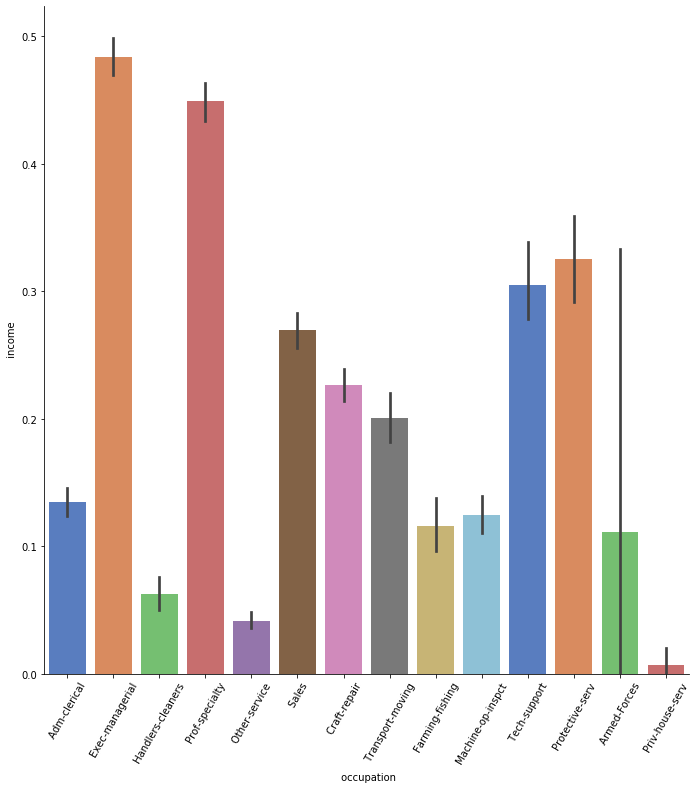

In [18]:
sns.factorplot(x=" occupation",y=" income",data=train,kind="bar", size = 10,  palette = "muted")
plt.xticks(rotation=60)

In [19]:
train[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

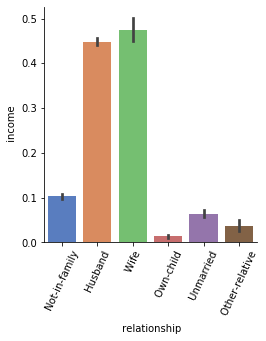

In [20]:
sns.factorplot(x=" relationship",y=" income",data=train,kind="bar", size = 4, palette = "muted")
plt.xticks(rotation=65)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

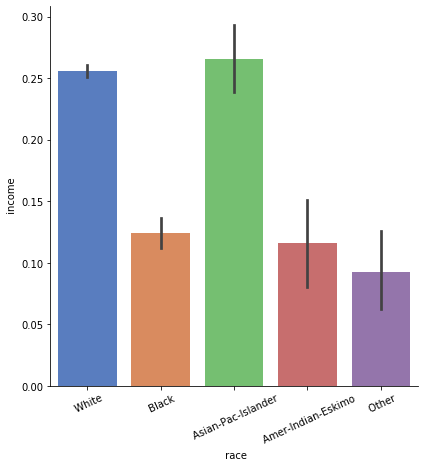

In [21]:
sns.factorplot(x=" race",y=" income",data=train,kind="bar", size = 6, palette = "muted")
plt.xticks (rotation = 25)

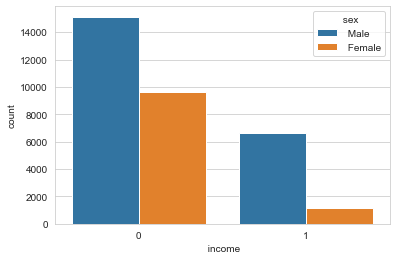

In [22]:
sns.set_style('whitegrid')
sns.countplot(x=' income', hue=' sex', data=train)

In [23]:
train[' native-country']. describe()

count              31978
unique                41
top        United-States
freq               29170
Name:  native-country, dtype: object

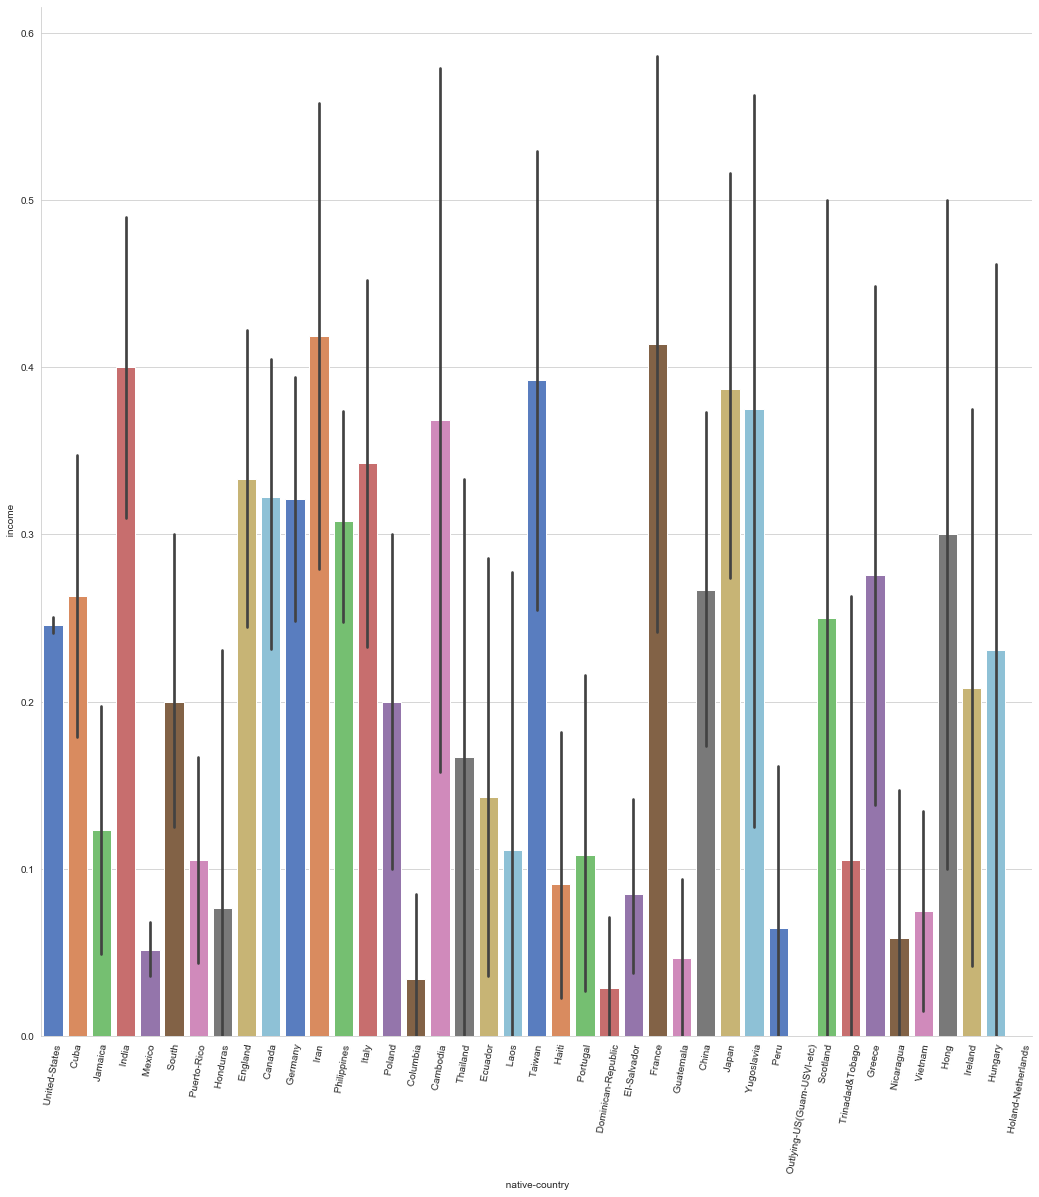

In [24]:
sns.factorplot(x=" native-country",y= " income",data=train,kind="bar", size = 15,  palette = "muted")
plt.xticks(rotation=80);

In [25]:
train[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [26]:
def native(country):
    if country in [' United-States', ' Cuba', ' Mexico', ' Canada', ' Dominican-Republic', ' Outlying-US(Guam-USVI-etc)']:
        return 'North America'
    elif country in [' England', ' Germany', ' Poland', ' Italy', ' France', ' Greece', ' Portugal', ' Ireland', ' Yugoslavia', 
                     ' Hungary', ' Scotland', ' Holand-Netherlands']:
        return 'Europe'
    elif country in [' Puerto-Rico', ' Honduras', ' Jamaica', ' Haiti', ' El-Salvador', ' Guatemala',  
                     ' Trinadad&Tobago', ' Nicaragua']:
        return 'Caribbean' 
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Philippines', ' China', ' Hong', ' Thailand',
                    ' Laos', ' Vietnam']:
        return 'Asia'
    elif country in [' South', ' Columbia', ' Peru',' Ecuador']:
        return 'South America'
    
    else: 
        return country   

In [27]:
train[' native-country'] = train[' native-country'].apply(native)
train[' native-country'].value_counts()

North America    30113
Asia               671
Europe             521
Caribbean          475
South America      198
Name:  native-country, dtype: int64

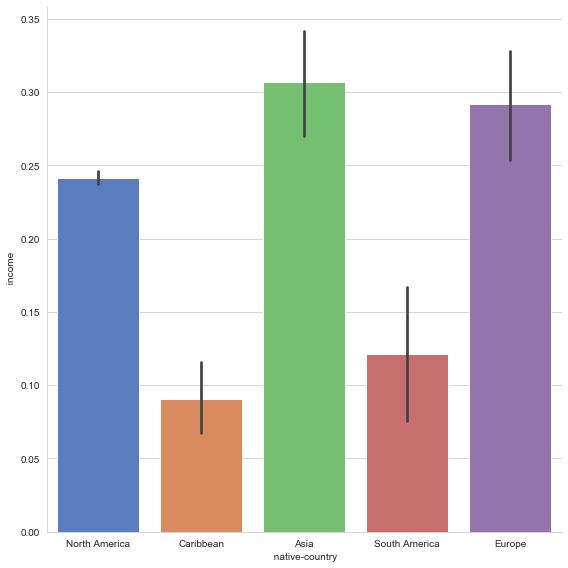

In [28]:
sns.factorplot(x=" native-country",y= " income",data=train,kind="bar", size = 8,  palette = "muted")

In [29]:
train = pd.get_dummies(train)
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Asia,native-country_Caribbean,native-country_Europe,native-country_North America,native-country_South America
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(' income',axis=1), 
           train[' income'], test_size=0.30, random_state=121)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\DostTech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7443
           1       0.72      0.60      0.66      2326

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769



In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[6906  537]
 [ 919 1407]]


In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,predictions)

0.7663763952557061

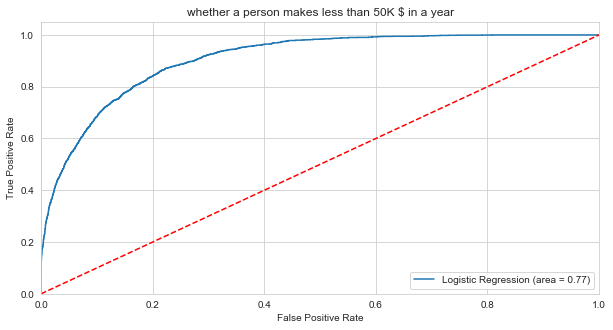

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('whether a person makes less than 50K $ in a year')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()